In [2]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import random

def abs_day(x):
    x = str(x)
    if len(x)>9:
        return (int(x[:4])-2019)*365 + int(x[5:7])*30 + int(x[8:10])
    else:
        return -1 

In [40]:
   
df = pd.read_csv('/kaggle/input/ecommerce-purchase-history-from-electronics-store/kz.csv',
                dtype={'user_id': str, 
                      'order_id': str, 
                      'product_id': str, 
                      'category_id':str
                      })

df['absolute_day'] = df['event_time'].apply(abs_day).astype(int)# добавление столбца absolute day 

In [42]:
print(len(df))
df = df[df['event_time']>'2000-01-01']
print(df['event_time'].max())
print(df['event_time'].min())
print(len(df))
print(len(df['user_id'].unique()))

2633521
2020-11-21 10:10:30 UTC
2020-01-05 03:26:46 UTC
2613890
233576


In [43]:
pd.set_option('display.max_columns', 100)
print('brand count', len(df['brand'].unique()))
print('top 50 brand')
histogram = df['brand'].value_counts()
histogram = histogram[:50]
brands = [brand for brand  in list(histogram.index) if brand != 'none']
df.loc[~df['brand'].isin(brands),'brand'] = 'none'
histogram = df['brand'].value_counts()
enumeration = dict(zip(histogram.index, range(len(histogram))))
df['brand'] = df['brand'].replace(enumeration)

brand count 22956
top 50 brand


In [44]:
print('category_code', len(df['category_code'].unique()))
print('top 50 category codes')
histogram = df['category_code'].value_counts()
histogram = histogram[:50]
brands = [brand for brand  in list(histogram.index) if brand != 'none']
df.loc[~df['category_code'].isin(brands),'category_code'] = 'none'
histogram = df['category_code'].value_counts()
enumeration = dict(zip(histogram.index, range(len(histogram))))
df['category_code'] = df['category_code'].replace(enumeration)

category_code 510
top 50 category codes


In [45]:
df

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,absolute_day
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648170900,27,1,162.01,1515915625441993984,509
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2268105426648170900,27,1,162.01,1515915625441993984,509
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997728,7,5,77.52,1515915625447879434,509
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2268105430162997728,7,5,77.52,1515915625447879434,509
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2268105471367840086,0,0,217.57,1515915625443148002,509
...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2268105428166508982,1,10,138.87,1515915625514888605,716
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2268105428166508982,1,4,418.96,1515915625514891148,716
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2268105402447037312,18,12,12.48,1515915625514834281,716
2633519,2020-11-21 10:10:30 UTC,2388440981134693944,2273948184839454837,2268105440371933882,0,23,41.64,1515915625514834281,716


customer activity
top 30
1515915625456901629    240
1515915625505835892    206
1515915625514704541    204
1515915625512016162    185
1515915625466740683    185
1515915625513724906    175
1515915625442940349    169
1515915625513720707    159
1515915625492172027    148
1515915625512895841    139
1515915625493669107    132
1515915625482090241    131
1515915625446232293    126
1515915625471182640    124
1515915625443885349    111
1515915625451777961    111
1515915625441217288    111
1515915625478190829    108
1515915625441440382    104
1515915625441161681    101
1515915625445990176    100
1515915625513723680     95
1515915625470653369     95
1515915625510250923     94
1515915625493109157     90
1515915625455038415     87
1515915625452023206     84
1515915625441282598     83
1515915625513740216     83
1515915625494530264     82
Name: user_id, dtype: int64
median customer


61162

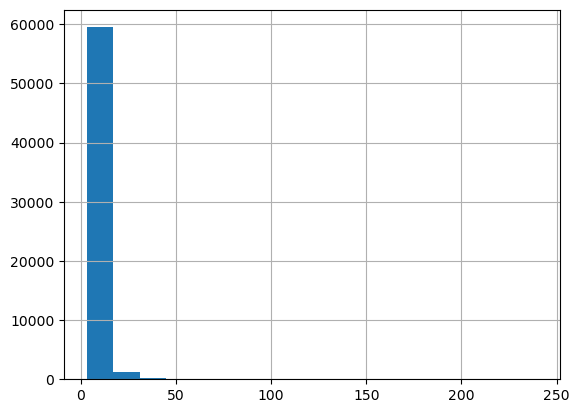

In [46]:
pd.set_option('display.max_columns', 100)
print('customer activity')
print('top 30')
print(df['user_id'].value_counts()[:30])# топ 30 пользователей и количество их активностей 
print('median customer')
histogram = df['user_id'].value_counts()
histogram = histogram[(histogram>=3)] # фильтрует histogram где потльзователь проявил активность три и более раза
histogram.hist(bins=17)# рисует гистограмму 
len(histogram.index) # количество пользователей совершивших активность 3 и более раза

In [48]:
print(61162, len(df))
df = df[df['user_id'].isin(histogram.index)] # оставляет в df пользователей которые были активны 3 и более раза
print(len(df)) # почему то не равно 61162       

df = df.sort_values(by=['user_id','event_time']) # сортирует пользователей из df по убывающему event_time
# distances = []

61162 2613890
15298


In [ ]:
results = []
users = df['user_id'].unique()
df['absolute_day'] = df['absolute_day'].astype(int)
for user in tqdm(users):
    small_df = df[df['user_id']==user]
    start_day = small_df['absolute_day'].min()
    last_day = small_df['absolute_day'].max()
    if last_day > 670:
        last_day = 670
    for iteration in range((last_day-start_day)//100):
        check_day = random.randint(max(30, start_day), last_day)
        month_df = small_df[(check_day-30<small_df['absolute_day'])&(small_df['absolute_day']<=check_day)]
        month_buys = len(month_df)
        if month_buys>0:
            month_amount = month_df['price'].sum()
            month_check = month_amount / month_buys
            month_brand_mode = month_df['brand'].mode().iloc[0]
            month_brand_last = month_df.iloc[-1, month_df.columns.get_loc('brand')]
            month_category_mode = month_df['category_code'].mode().iloc[0]
            month_category_last = month_df.iloc[-1, month_df.columns.get_loc('category_code')]        
        else:     
            month_amount = 0
            month_check = 0
            month_brand_mode = -1
            month_brand_last = -1
            month_category_mode = -1
            month_category_last = -1        
        
        week_df = small_df[(check_day-7<small_df['absolute_day'])&(small_df['absolute_day']<=check_day)]
        week_buys = len(week_df)
        week_amount = week_df['price'].sum()
        if week_buys > 0:
            week_check = week_amount / week_buys
        else:
            week_check = 0
    
        week2_df = small_df[(check_day-14<small_df['absolute_day'])&(small_df['absolute_day']<=check_day)]
        week2_buys = len(week2_df)
        week2_amount = week2_df['price'].sum()
        if week2_buys > 0:
            week2_check = week2_amount / week2_buys
        else:
            week2_check = 0
        churn_df = small_df[(check_day<small_df['absolute_day'])&(small_df['absolute_day']<=check_day+30)]
        if len(churn_df) > 0:
            churn = 0
        else:
            churn = 1
            
        results.append({'user_id':user,'week_buys':week_buys,'week_amount':week_amount,
                    'week_check':week_check,'week2_buys':week2_buys,'week2_amount':week2_amount,
                    'week2_check':week2_check,'month_buys':month_buys,'month_amount':month_amount,
                    'month_check':month_check,
                    'month_category_last':month_category_last,
                    'month_category_mode':month_category_mode,
                    'month_brand_last':month_brand_last,
                    'month_brand_mode':month_brand_mode,
                        'churn': churn})
    
mf = pd.DataFrame.from_dict(results)    
mf.to_csv('train.csv', index=False)

сколько юзер покупок сделал за последнюю неделю, месяц, 2 месяца за все время
на какую сумму юзер купил за последнюю неделю, месяц, 2 месяца
средний чек юзера за последнюю неделю и месяц, 2 месяца
как использовать бренды?
как использовать категории?

In [50]:
mf = pd.read_csv('/kaggle/input/train1/train (1).csv', dtype={'user_id': str, 
                      'order_id': str, 
                      'product_id': str, 
                      'category_id':str
                      })[:-1] # новый dataframe "mf" с оттоком пользователей,информацией о покупках и тд,отток = неактивность пользователя 30 дней
#print('Проверка уникальности, количество пользователей, ',[len(mf['user_id'].unique()),len(mf)]) # уникальные пользователи и общее количество
print('Количество ушедших пользователей ', mf['churn'].sum())
print('Количество оставшихся пользователей', len(mf) - mf['churn'].sum())
print('Процент оставшихся пользователей', round(100*(len(mf) - mf['churn'].sum())/len(mf),2),'%')


Количество ушедших пользователей  9663
Количество оставшихся пользователей 5635
Процент оставшихся пользователей 36.83 %


In [10]:
mf

11535


In [58]:
print(mf['month_category_mode'].unique())
print(mf['month_category_last'].unique())
print(mf['month_brand_mode'].unique())

[ 7 -1 21 17  0  2 11  8  1 23 19 15 41 22 32 10  5  6 45 27 40 39 30  4
 47 28 33 18 38 42  9 36 35 43 26 50 29 48 46 31 34 20]
[ 7 -1 21 17 45 34  0 43  8  1 40 23 19 15 41 22 32 10  5 33 28 50 27 47
 20  6 30 39  2 11  4  9 48 18 38 26 42 36 35 29 31 46]
[ 4 -1  2  9  0  1 43 12 15  3 22 30 11  7 10  6 28 33  5 32 27 31 46 17
 20 14 16 41 37 38 18 45 40 42 25 13 19 35 36 24 23 26 39  8 48 21 34 44
 47 29]


In [36]:
###### from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( #Эта строка разбивает функции и целевые данные на наборы для обучения и тестирования.
    mf[[ 'week_buys', 'week_amount', 'week_check', 'week2_buys',
       'week2_amount', 'week2_check', 'month_buys', 'month_amount',
       'month_check', 'month_category_last','month_category_mode', 
       'month_brand_last','month_brand_mode']], mf[['churn']], stratify = mf[['churn']], random_state=3)

X_train, X_test, y_train, y_test = train_test_split(
    mf[[ 'week_buys', 'week_amount', 'week_check', 'week2_buys',
       'week2_amount', 'week2_check', 'month_buys', 'month_amount',
       'month_check', 'month_category_last','month_category_mode', 
       'month_brand_last','month_brand_mode']], mf[['churn']], stratify = mf[['churn']], random_state=3)

# Init classifier
model = xgb.XGBClassifier(scale_pos_weight=0.55, #Вес положительного класса
                         max_depth=3, #максимальная глубина дерева
                         n_estimators=10000) #количество базовых моделей, которые будут использоваться

# Fit
eval_set = [(X_test, y_test)] #Эта строка создает оценочный набор для ранней остановки во время обучения модели.
model.fit(X_train, y_train, early_stopping_rounds=4,  
          eval_metric="error", eval_set=eval_set, verbose=True)
#model.fit(X_train, y_train, early_stopping_rounds=4, eval_metric="error", eval_set=eval_set, verbose=True) Эта строка подгоняет модель XGBoost к обучающим данным.
#early_stopping_rounds Параметр останавливает тренировку, если производительность не улучшается после 4 раундов.
#eval_metric = "error" установлено значение «ошибка», чтобы оценить частоту ошибок модели.
#eval_set=eval_set используется для ранней остановки
#verbose=True отображает ход обучения.

# Predict
prediction = model.predict(X_test) # Эта строка использует обученную модель для прогнозирования функций тестирования.
print(accuracy_score(y_test, prediction)) #Он вычисляет и печатает показатель точности, сравнивая предсказанные метки (prediction) с истинными метками (y_test).
print(confusion_matrix(y_test, prediction))#Эта строка вычисляет и печатает матрицу путем сравнения предсказанных меток (prediction) с истинными метками (y_test).

prediction = model.predict(X_train)# Эта строка использует обученную модель для прогнозирования функций обучения.
print(accuracy_score(y_train, prediction))#Он вычисляет и печатает оценку точности обучающего набора, сравнивая предсказанные метки (прогноз) с истинными метками (y_train).
print(confusion_matrix(y_train, prediction)) 

# Predict
prediction = model.predict(X_test)
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
# tp "верно предсказан уход клиента"
# tn "верно предсказана лояльность клиента"
# fp "неверный прогноз об уходе клиента"
# fn "неверный прогноз о лояльности клиента"
print('recall', tp/(tp+fn)) #Он измеряет точность выявления предикты уходящих пользователей.полнота
print('precision', tp/(tp+fp)) #Он измеряет точность модели в прогнозировании случаев оттока среди положительных прогнозов. точность 
print('изменение прибыли компании', (1000*(tp * 0.035 - fp * 0.05)))# положительный 
print('tp',tp,"верно предсказан уход клиента")
print('tn',tn, "верно предсказана лояльность клиента")
print('fn',fn, "неверый прогноз о лояльности клиента")
print('fp',fp, "неверный прогноз об уходе клиента") #y test true y prediction 

X_train, X_test, y_train, y_test = train_test_split(
    mf[[ 'week_buys', 'week_amount', 'week_check', 'week2_buys',
       'week2_amount', 'week2_check', 'month_buys', 'month_amount',
       'month_check', 'month_category_last', 'month_category_mode',
       'month_brand_last','month_brand_mode']], mf[['churn']], stratify = mf[['churn']], random_state=3)

[0]	validation_0-error:0.37046
[1]	validation_0-error:0.38667
[2]	validation_0-error:0.38667
[3]	validation_0-error:0.39007
[4]	validation_0-error:0.39111


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.6295424836601308
[[ 228 1181]
 [ 236 2180]]
0.6353177024317964
[[ 759 3467]
 [ 717 6530]]
0.6295424836601308
[[ 228 1181]
 [ 236 2180]]
recall 0.902317880794702
precision 0.6486164831895269
изменение прибыли компании 17250.000000000007
tp 2180 верно предсказан уход клиента
tn 228 верно предсказана лояльность клиента
fn 236 неверый прогноз о лояльности клиента
fp 1181 неверный прогноз об уходе клиента
